# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Shahadath.DE
[nltk_data]     SKTOP-I3TKOE6\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")

print(f"News API Key type: {type(news_api_key)}")

News API Key type: <class 'str'>


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

newsapi

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin",
                                  language='en')

In [10]:
# Quick summary of BTC news
print(f"Here is an example of BTC news: \n"
      f"\n"
      f"{btc_news['articles'][0]}")
print()
print(f"The total number of articles received is {btc_news['totalResults']}")

Here is an example of BTC news: 

{'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Paul Ford', 'title': 'A Field Guide for Nature-Resistant Nerds', 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.', 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/', 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg', 'publishedAt': '2021-08-06T11:00:00Z', 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}

The total number of articles received is 7342


In [11]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum",
                                  language="en")

In [12]:
# Quick summary of ETH news
print(f"Here is an example of ETH news: \n"
      f"\n"
      f"{eth_news['articles'][0]}")
print()
print(f"The total number of articles received is {eth_news['totalResults']}")

Here is an example of ETH news: 

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'}, 'author': 'Connie Loizos', 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’', 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…', 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/', 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667', 'publishedAt': '2021-07-16T16:00:55Z', 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 c

In [13]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

# Get sentiment and append to list
for article in btc_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        negative = sentiment["neg"]
        neutral = sentiment["neu"]
        
        btc_sentiments.append({"text": text,
                               "compound": compound,
                               "positive": positive,
                               "negative": negative,
                               "neutral": neutral})
    except AttributError:
        pass

In [14]:
# Create sentiment dataframe
btc_sentiments_df = pd.DataFrame(btc_sentiments)

In [15]:
# Show results
print("Below is what the BTC sentiments table looks like:")
print()
display(btc_sentiments_df.head())
print()
print("Below is the description of the BTC sentiments table:")
print()
print(btc_sentiments_df.describe())

Below is what the BTC sentiments table looks like:



,text,compound,positive,negative,neutral
0,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
2,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
3,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
4,"As longtime TechCrunch readers know well, Mich...",0.2732,0.097,0.000,0.903



Below is the description of the BTC sentiments table:

        compound   positive   negative   neutral
count  20.000000  20.000000  20.000000  20.00000
mean    0.048400   0.059400   0.046450   0.89415
std     0.463778   0.059611   0.083549   0.09326
min    -0.827100   0.000000   0.000000   0.65300
25%    -0.307000   0.000000   0.000000   0.85325
50%     0.000000   0.056000   0.000000   0.91050
75%     0.445000   0.092500   0.076250   0.95425
max     0.726400   0.178000   0.287000   1.00000


In [16]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

# Get sentiment and append to list
for article in eth_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        negative = sentiment["neg"]
        neutral = sentiment["neu"]
        
        eth_sentiments.append({"text": text,
                               "compound": compound,
                               "positive": positive,
                               "negative": negative,
                               "neutral": neutral})
    except AttributError:
        pass

In [17]:
# Create sentiment dataframe
eth_sentiments_df = pd.DataFrame(eth_sentiments)

In [18]:
# Show results
print("Below is what the ETH sentiments table looks like:")
print()
display(eth_sentiments_df.head())
print()
print("Below is the description of the ETH sentiments table:")
print()
print(eth_sentiments_df.describe())

Below is what the ETH sentiments table looks like:



,text,compound,positive,negative,neutral
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
4,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000



Below is the description of the ETH sentiments table:

        compound   positive  negative   neutral
count  20.000000  20.000000  20.00000  20.00000
mean    0.174515   0.056050   0.01345   0.93050
std     0.312339   0.073898   0.02766   0.08117
min    -0.340000   0.000000   0.00000   0.78200
25%     0.000000   0.000000   0.00000   0.84275
50%     0.000000   0.000000   0.00000   0.96950
75%     0.402575   0.129500   0.00000   1.00000
max     0.726400   0.190000   0.07200   1.00000


In [ ]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

In [ ]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

### Questions:

Q: Which coin had the highest mean positive score?

A: ETH had a lower score of (0.056050) as compared to BTC  (0.059400)

Q: Which coin had the highest compound score?

A:  Eth (0.726400) and Btc (0.726400) had the same max

Q. Which coin had the highest positive score?

A: BTC (0.178000) and ETH had the highest positive score (0.190000)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = ["the", "will", "of", "with"]

In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words_tokenized = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words_tokenized]
   
    # Convert the words to lowercase
    words_lowercase = [word.lower() for word in lem]
    
    # Remove the stop words
    words_str = ' '.join(words_lowercase)
    
    tokens = [word for word in words_lowercase if word not in sw.union(sw_addons)]
    
    return tokens

In [25]:
# Create a new tokens column for Bitcoin
btc_tokens_list = []

for text in btc_sentiments_df['text']:
    
    tokenized_text = tokenizer(text)
    
    btc_tokens_list.append(tokenized_text)
    
btc_sentiments_df["tokens"] = btc_tokens_list

btc_sentiments_df = btc_sentiments_df[["compound", "positive", "negative", "neutral", "text", "tokens"]] 

btc_sentiments_df.head()

,compound,positive,negative,neutral,text,tokens
0,-0.3400,0.000,0.061,0.939,When my wife started a little garden in our ur...,"[wife, started, little, garden, urban, backyar..."
1,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, mayor, reno, leader,..."
2,0.6240,0.127,0.000,0.873,To get a roundup of TechCrunchs biggest and mo...,"[get, roundup, techcrunchs, biggest, important..."
3,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
4,0.2732,0.097,0.000,0.903,"As longtime TechCrunch readers know well, Mich...","[longtime, techcrunch, reader, know, well, mic..."


In [29]:
# Create a new tokens list for Bitcoin across all texts
btc_text = str(list(btc_sentiments_df['text']))

btc_tokens = tokenizer(btc_text)

print(f"Here is an example of BTC word tokens: {btc_tokens[:50]}")
print()
print(f"The total number of BTC word tokens are: {len(btc_tokens)}")

Here is an example of BTC word tokens: ['wife', 'started', 'little', 'garden', 'urban', 'backyard', 'could', 'think', 'worm', 'also', 'bug', 'dirt', 'course', 'filled', 'worm', 'bug', 'composted', 'corn', 'cob', 'char', 'like', 'dogecoin', 'devotee', 'mayor', 'reno', 'leader', 'el', 'salvador', 'aldo', 'baoicchi', 'convinced', 'cryptocurrency', 'future', 'ceo', 'founder', 'canadian', 'scooter', 'maker', 'daymak', 'belief', 'char', 'get', 'roundup', 'techcrunchs', 'biggest', 'important', 'story', 'delivered', 'inbox', 'every']

The total number of BTC word tokens are: 391


In [30]:
# Create a new tokens column for Ethereum
eth_tokens_list = []

for text in eth_sentiments_df['text']:
    
    tokenized_text = tokenizer(text)
    
    eth_tokens_list.append(tokenized_text)

eth_sentiments_df["tokens"] = eth_tokens_list

eth_sentiments_df = eth_sentiments_df[["compound", "positive", "negative", "neutral", "text", "tokens"]] 

eth_sentiments_df.head()


,compound,positive,negative,neutral,text,tokens
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,-0.2411,0.000,0.061,0.939,Blockchain infrastructure startups are heating...,"[blockchain, infrastructure, startup, heating,..."
2,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
3,0.6956,0.190,0.000,0.810,Cent was founded in 2017 as an ad-free creator...,"[cent, wa, founded, adfree, creator, network, ..."
4,0.0000,0.000,0.000,1.000,Representation of the Ethereum virtual currenc...,"[representation, ethereum, virtual, currency, ..."


In [35]:
# Create a new tokens column for Ethereum
eth_text = str(list(eth_sentiments_df['text']))

eth_tokens = tokenizer(eth_text)

print(f"Here is an example of ETH word tokens: {eth_tokens[:10]}")
print()
print(f"The total number of ETH word tokens are: {len(eth_tokens)}")

Here is an example of ETH word tokens: ['many', 'blockchain', 'platform', 'competing', 'investor', 'developer', 'attention', 'right', 'big', 'daddy']

The total number of ETH word tokens are: 389


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [36]:
from collections import Counter
from nltk import ngrams

In [37]:
# Bitcoin Counter
btc_word_count = Counter(btc_tokens)

print(f"Here's the word count: \n"
      f"\n"
      f"{dict(btc_word_count)}")
print()
print(f"Here's the most commont: {dict(btc_word_count.most_common(10))}")

Here's the word count: 

{'wife': 1, 'started': 1, 'little': 1, 'garden': 1, 'urban': 1, 'backyard': 1, 'could': 1, 'think': 1, 'worm': 2, 'also': 1, 'bug': 2, 'dirt': 1, 'course': 1, 'filled': 1, 'composted': 1, 'corn': 1, 'cob': 1, 'char': 19, 'like': 2, 'dogecoin': 2, 'devotee': 1, 'mayor': 1, 'reno': 1, 'leader': 1, 'el': 1, 'salvador': 1, 'aldo': 1, 'baoicchi': 1, 'convinced': 1, 'cryptocurrency': 2, 'future': 1, 'ceo': 1, 'founder': 1, 'canadian': 1, 'scooter': 1, 'maker': 2, 'daymak': 1, 'belief': 1, 'get': 3, 'roundup': 1, 'techcrunchs': 1, 'biggest': 1, 'important': 1, 'story': 1, 'delivered': 1, 'inbox': 1, 'every': 1, 'day': 1, 'pm': 1, 'pdt': 1, 'subscribe': 1, 'herernhello': 1, 'welcome': 1, 'daily': 1, 'crunch': 1, 'july': 5, 'retail': 1, 'investor': 1, 'grew': 1, 'comfortable': 1, 'buying': 1, 'cryptocurrencies': 3, 'bitcoin': 10, 'ethereum': 2, 'decentralized': 1, 'application': 1, 'world': 3, 'still': 1, 'ha': 2, 'lot': 1, 'work': 1, 'come': 1, 'onboarding': 1, 'longti

In [38]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = Counter(ngrams(btc_tokens,n=2))

print(f"Here BTC bigrams: \n"
      f"\n"
      f"{dict(btc_bigrams)}")

Here BTC bigrams: 

{('wife', 'started'): 1, ('started', 'little'): 1, ('little', 'garden'): 1, ('garden', 'urban'): 1, ('urban', 'backyard'): 1, ('backyard', 'could'): 1, ('could', 'think'): 1, ('think', 'worm'): 1, ('worm', 'also'): 1, ('also', 'bug'): 1, ('bug', 'dirt'): 1, ('dirt', 'course'): 1, ('course', 'filled'): 1, ('filled', 'worm'): 1, ('worm', 'bug'): 1, ('bug', 'composted'): 1, ('composted', 'corn'): 1, ('corn', 'cob'): 1, ('cob', 'char'): 1, ('char', 'like'): 1, ('like', 'dogecoin'): 1, ('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 1, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', 'char'): 1, ('cha

In [39]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = Counter(ngrams(eth_tokens,n=2))

print(f"Here ETH bigrams: \n"
      f"\n"
      f"{dict(eth_bigrams)}")

Here ETH bigrams: 

{('many', 'blockchain'): 1, ('blockchain', 'platform'): 1, ('platform', 'competing'): 1, ('competing', 'investor'): 1, ('investor', 'developer'): 1, ('developer', 'attention'): 1, ('attention', 'right'): 1, ('right', 'big'): 1, ('big', 'daddy'): 1, ('daddy', 'ethereum'): 1, ('ethereum', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'killers'): 1, ('killers', 'like'): 1, ('like', 'solana'): 1, ('solana', 'wrote'): 1, ('wrote', 'char'): 1, ('char', 'blockchain'): 1, ('blockchain', 'infrastructure'): 1, ('infrastructure', 'startup'): 1, ('startup', 'heating'): 1, ('heating', 'industry'): 1, ('industry', 'fervor'): 1, ('fervor', 'brings'): 1, ('brings', 'developer'): 1, ('developer', 'user'): 1, ('user', 'space'): 1, ('space', 'still'): 1, ('still', 'feel'): 1, ('feel', 'extremely'): 1, ('extremely', 'young'): 1, ('young', 'despite'): 1, ('despite', 'heavy'): 1, ('heavy', 'institutional'): 1, ('institutional', 'embrace'): 1, ('embrace', 'crypto'): 1, ('crypt

In [40]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [41]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10_token_count = token_count(btc_tokens)

print(f"Here are the top 10 words for BTC: \n"
      f" \n"
      f"{dict(btc_top10_token_count)}")

Here are the top 10 words for BTC: 
 
{'char': 19, 'bitcoin': 10, 'reuters': 6}


In [42]:
# Use token_count to get the top 10 words for Ethereum
eth_top10_token_count = token_count(eth_tokens)

print(f"Here are the top 10 words for ETH: \n"
      f" \n"
      f"{dict(eth_top10_token_count)}")

Here are the top 10 words for ETH: 
 
{'char': 20, 'ethereum': 15, 'cryptocurrencies': 5}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [44]:
btc_token_str = ' '.join(btc_tokens)
btc_token_str

'wife started little garden urban backyard could think worm also bug dirt course filled worm bug composted corn cob char like dogecoin devotee mayor reno leader el salvador aldo baoicchi convinced cryptocurrency future ceo founder canadian scooter maker daymak belief char get roundup techcrunchs biggest important story delivered inbox every day pm pdt subscribe herernhello welcome daily crunch july char retail investor grew comfortable buying cryptocurrencies like bitcoin ethereum decentralized application world still ha lot work come onboarding char longtime techcrunch reader know well michael arrington cofounded techcrunch crunchbase well venture fund crunchfund wa later renamed tuesday capital arringto char singapore july reuters bitcoin broke wednesday headed another attempt breaking monthslong range short seller bailed trader drew confidence fr char james martincnetrna uk man wa arrested spain alleged role massive hack highprofile twitter account targeted politiciansxaand celebrit

Text(0.5, 1.0, 'Bitcoin Word Cloud')

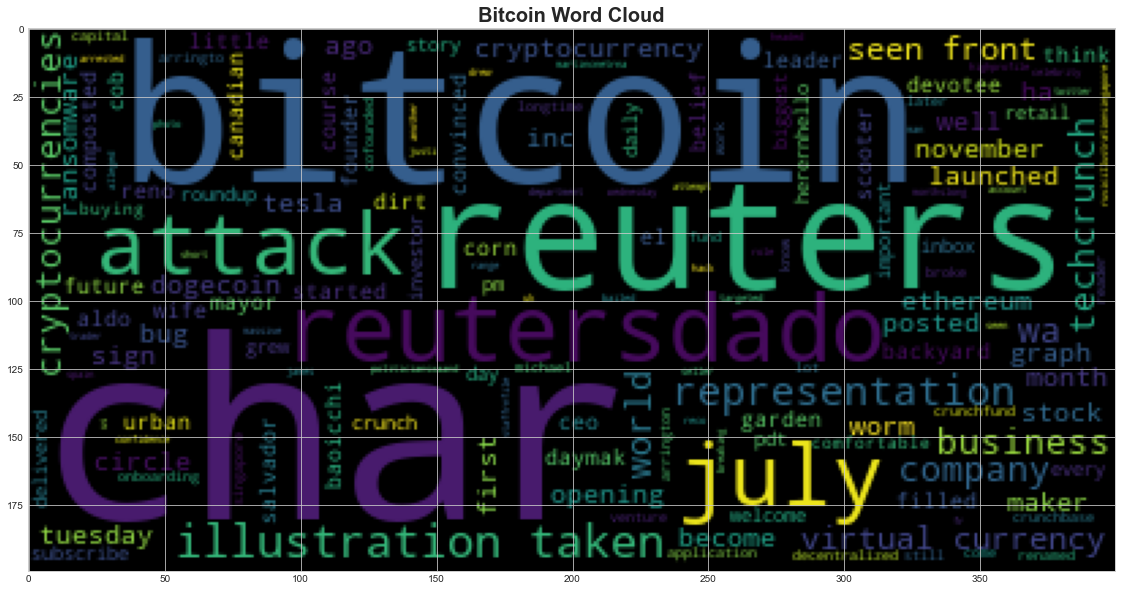

In [45]:
# Generate the Bitcoin word cloud
btc_token_str = ' '.join(btc_tokens)

btc_wc = WordCloud().generate(btc_token_str)

plt.imshow(btc_wc)
plt.title("Bitcoin Word Cloud", fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Ethereum Word Cloud')

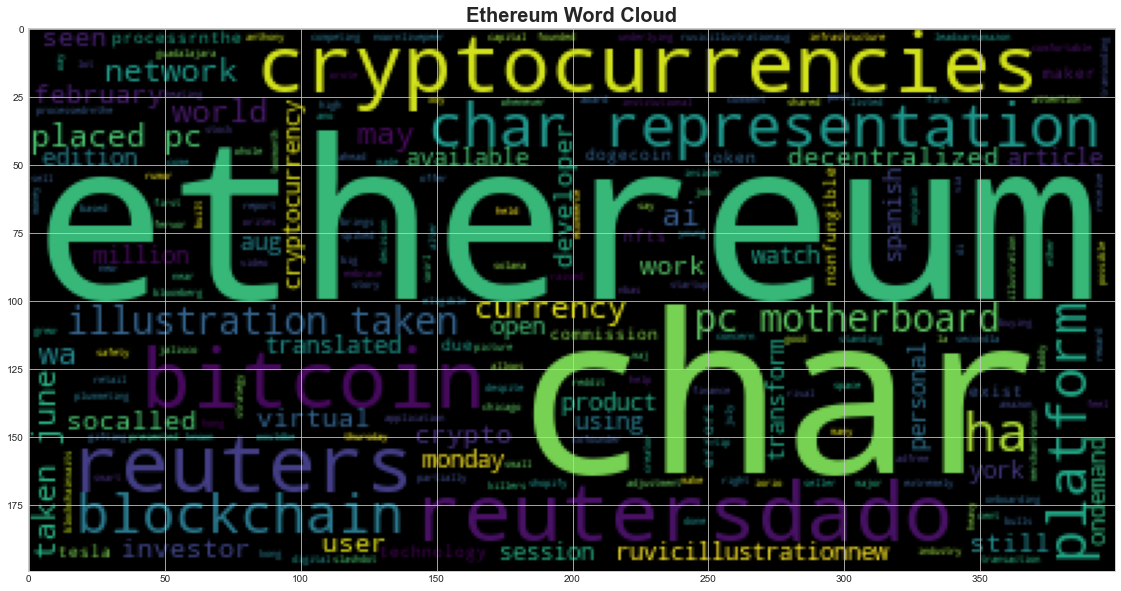

In [46]:
# Generate the Ethereum word cloud
eth_token_str = ' '.join(eth_tokens)

etc_wc = WordCloud().generate(eth_token_str)

plt.imshow(etc_wc)
plt.title("Ethereum Word Cloud", fontsize=20, fontweight='bold')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [47]:
import spacy
from spacy import displacy

In [48]:
# Load the spaCy model
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [49]:
# Concatenate all of the Bitcoin text together
btc_text

'[\'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]\', \'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]\', \'To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\\r\\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]\', \'While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]\', \'As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the 

In [51]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document
btc_ner.user_data["title"] = "BTC Named Entity Recognition (NER) document"

In [52]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [53]:
# List all Entities
print(f"These are BTC entities: \n"
      f"\n"
      f"{btc_ner.ents}")

These are BTC entities: 

(Reno, El Salvador, Aldo Baoicchi, Canadian, Daymak, every day, 3 p.m. PDT, Daily Crunch, July 23, 2021, Bitcoin and Ethereum, 2021, Michael Arrington, TechCrunch, Crunchbase, CrunchFund, Tuesday, 2017, July 28, Reuters, 40,000, Wednesday, James Martin, UK, Spain, Twitter, 2020, the US Department of Justi, November 19, 2020, REUTERS, Dado Ruvic/IllustrationSINGAPORE, July 21, Reuters, Reuters, November 19, 2020, REUTERS, Dado Ruvic/Illustration\r\nSINGAPORE, June 29, 2021, REUTERS, Dado Ruvic, Ju, REUTERS, Dado Ruvic, 10, the Opening Bell, first, Entrepreneur, first, more than three decades ago, six months ago, dozens, February 9, 2021, REUTERS, Dado, Reuters, Tesla Inc, 2020.\r\nThese, Russian, hundreds, Concord Acquisition Corp, SPAC, LONDON, July 20, Reuters, Tuesday, almost a month, 30,000, Reuters, July 13, 2021, REUTERS, Dado Ruvic, Monday, Elon Musk, 22, 21, late last week)


---

### Ethereum NER

In [54]:
# Concatenate all of the Ethereum text together
eth_text

'[\'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]\', \'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]\', \'While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]\', \'Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]\', \'Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture,

In [55]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text)

# Add a title to the document
eth_ner.user_data["title"] = "ETH Named Entity Recognition (NER) document"

In [56]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [57]:
# List all Entities
print(f"These are ETH entities: \n"
      f"\n"
      f"{eth_ner.ents}")

These are ETH entities: 

(Ethereum, Ethereum Killers, Solana, Bitcoin and Ethereum, 2021, 2017, Reddit, Ethereum, Ethereum, February 3, 2018, REUTERS, Dado Ruvic, Aug 5, Reuters, HONG KONG, Aug 5, Reuters, two-month, Thursday, Ethereum, June 29, 2021, REUTERS, Dado Ruvic/IllustrationAug 3, Reuters, Ethereum, Monday, Amazon, Anthony Di Iorio, Ethereum, Bloomberg, Slashdot, Ethereum, June 29, 2021, REUTERS, Dado Ruvic, July 30, Reuters, second, $20 million, Ethereum, Spanish, AI, Xoy Capital, Guadalajara, Jalisco, Xoycoin, Monday, Chicago Bulls, American Express, Spanish, AI, this process.\r\nThe Securities and Exchange Commission, London, Ethereum, 12 965 000, August 3-5, Hackaday, Proof of Work, Bitcoin, Ethereum, $100 million, June 29, 2021, REUTERS, Dado Ruvic/Illustration/File, February 9, 2021, REUTERS, Dado, Reuters, Tesla Inc)


---